<a href="https://colab.research.google.com/github/samsoe/mpg_notebooks/blob/master/Visualizations_pellet_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bigrquery [Documentation](https://www.rdocumentation.org/packages/bigrquery/versions/1.2.0)
* billing [documentation](https://github.com/r-dbi/bigrquery/issues/366)

This is an R Notebook.  An API key needs to be generated externally and uploaded for reasons.

# Gather Tools

In [0]:
# bigquery api access
install.packages("bigrquery")
install.packages("httpuv")
install.packages("googleAuthR")

In [0]:
library(bigrquery)
library(httpuv)
library(tidyr)
library(ggplot2)
library(dplyr)

In [0]:
# set display width
library(repr)
options(repr.plot.width=17)

# Database Connection

In [0]:
# BigQuery API Key
bq_auth(path = "/content/mpg-data-warehouse-34434e1a9914.json")

In [0]:
Sys.setenv(BIGQUERY_TEST_PROJECT = "mpg-data-warehouse")

In [0]:
billing <- bq_test_project()

# Deer, Elk, Horse

## Query Database

In [0]:
sql <- "SELECT 
           *
        FROM 
          `mpg-data-warehouse.vegetation_biomass.pellet_count`"

In [0]:
tb <- bq_project_query(billing, sql)

In [0]:
pellet_count = bq_table_download(tb)

## Format

In [0]:
# convert to data frame
pellet_count <- as.data.frame(pellet_count)

In [0]:
pellet_count$year <- as.factor(pellet_count$year)

In [0]:
pellet_count$season <- as.factor(pellet_count$season)

In [0]:
# wide to long
pellet_count <- gather(pellet_count, ungulate, count, deer, elk, horse)

In [14]:
head(pellet_count)

,grid_point,year,season,ungulate,count
,<int>,<fct>,<fct>,<chr>,<dbl>
1,9,2020,spring,deer,0
2,11,2020,spring,deer,0
3,12,2020,spring,deer,0
4,20,2020,spring,deer,0
5,28,2020,spring,deer,0
6,29,2020,spring,deer,0


## Display

In [0]:
# make plots wider
options(repr.plot.width=15, repr.plot.height=8)

### Spring

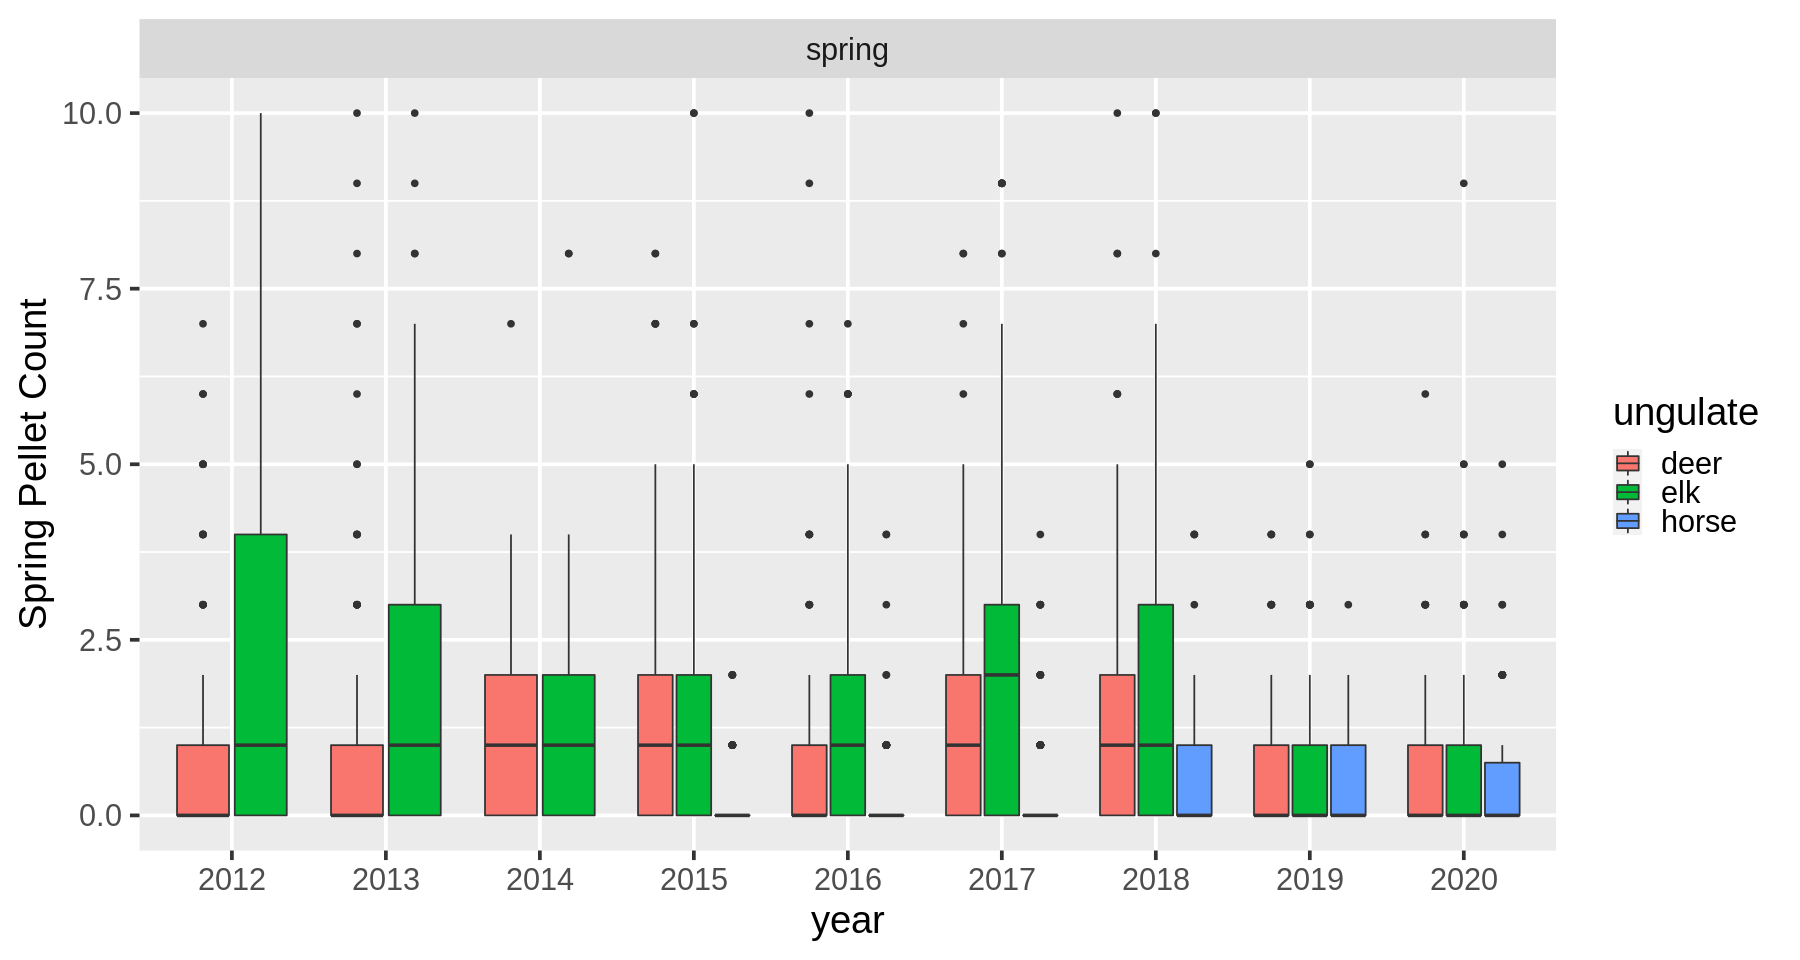

In [16]:
p <- ggplot(data = filter(pellet_count, season == "spring")) +
  geom_boxplot(aes(x=year, y=count, fill=ungulate), na.rm=TRUE)

p +
  scale_y_continuous(name="Spring Pellet Count", limits=c(0,10)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

### Fall

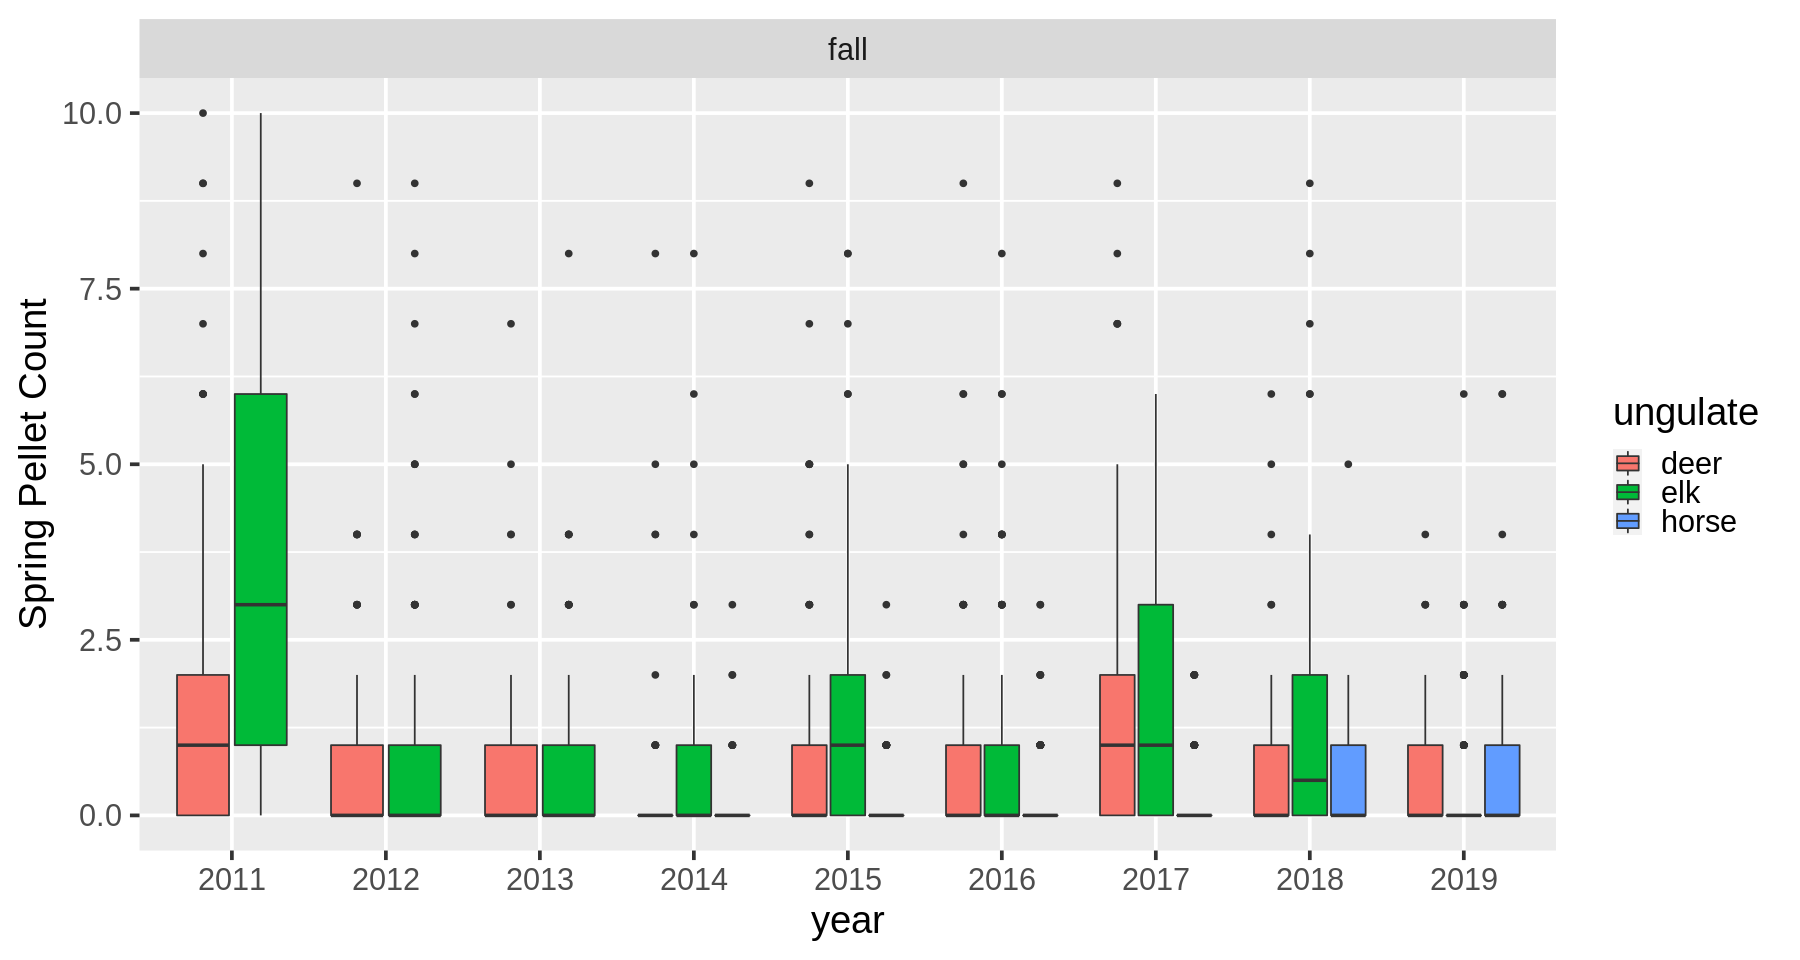

In [17]:
p <- ggplot(data = filter(pellet_count, season == "fall")) +
  geom_boxplot(aes(x=year, y=count, fill=ungulate), na.rm=TRUE)

p +
  scale_y_continuous(name="Spring Pellet Count", limits=c(0,10)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

# Combined

## Query Database

In [0]:
sql <- "SELECT
          grid_point,
          year,
          season,
          deer,
          elk,
          horse
        FROM
          `mpg-data-warehouse.vegetation_biomass.pellet_count`"

In [0]:
tb <- bq_project_query(billing, sql)

In [0]:
pellet_counts = bq_table_download(tb)

## Format

In [0]:
# convert to data frame
pellet_counts <- as.data.frame(pellet_counts)

In [0]:
pellet_counts$year <- as.factor(pellet_counts$year)

In [0]:
pellet_counts$season <- as.factor(pellet_counts$season)

In [24]:
head(pellet_counts)

,grid_point,year,season,deer,elk,horse
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,9,2020,spring,0,2,0
2,11,2020,spring,0,2,0
3,12,2020,spring,0,2,0
4,20,2020,spring,0,3,0
5,28,2020,spring,0,3,0
6,29,2020,spring,0,9,0


In [0]:
pellet_counts$sum_pellets <- rowSums(pellet_counts[,c("deer", "elk", "horse")], na.rm=TRUE)

In [26]:
head(pellet_counts)

,grid_point,year,season,deer,elk,horse,sum_pellets
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,2020,spring,0,2,0,2
2,11,2020,spring,0,2,0,2
3,12,2020,spring,0,2,0,2
4,20,2020,spring,0,3,0,3
5,28,2020,spring,0,3,0,3
6,29,2020,spring,0,9,0,9


## Display

### Spring

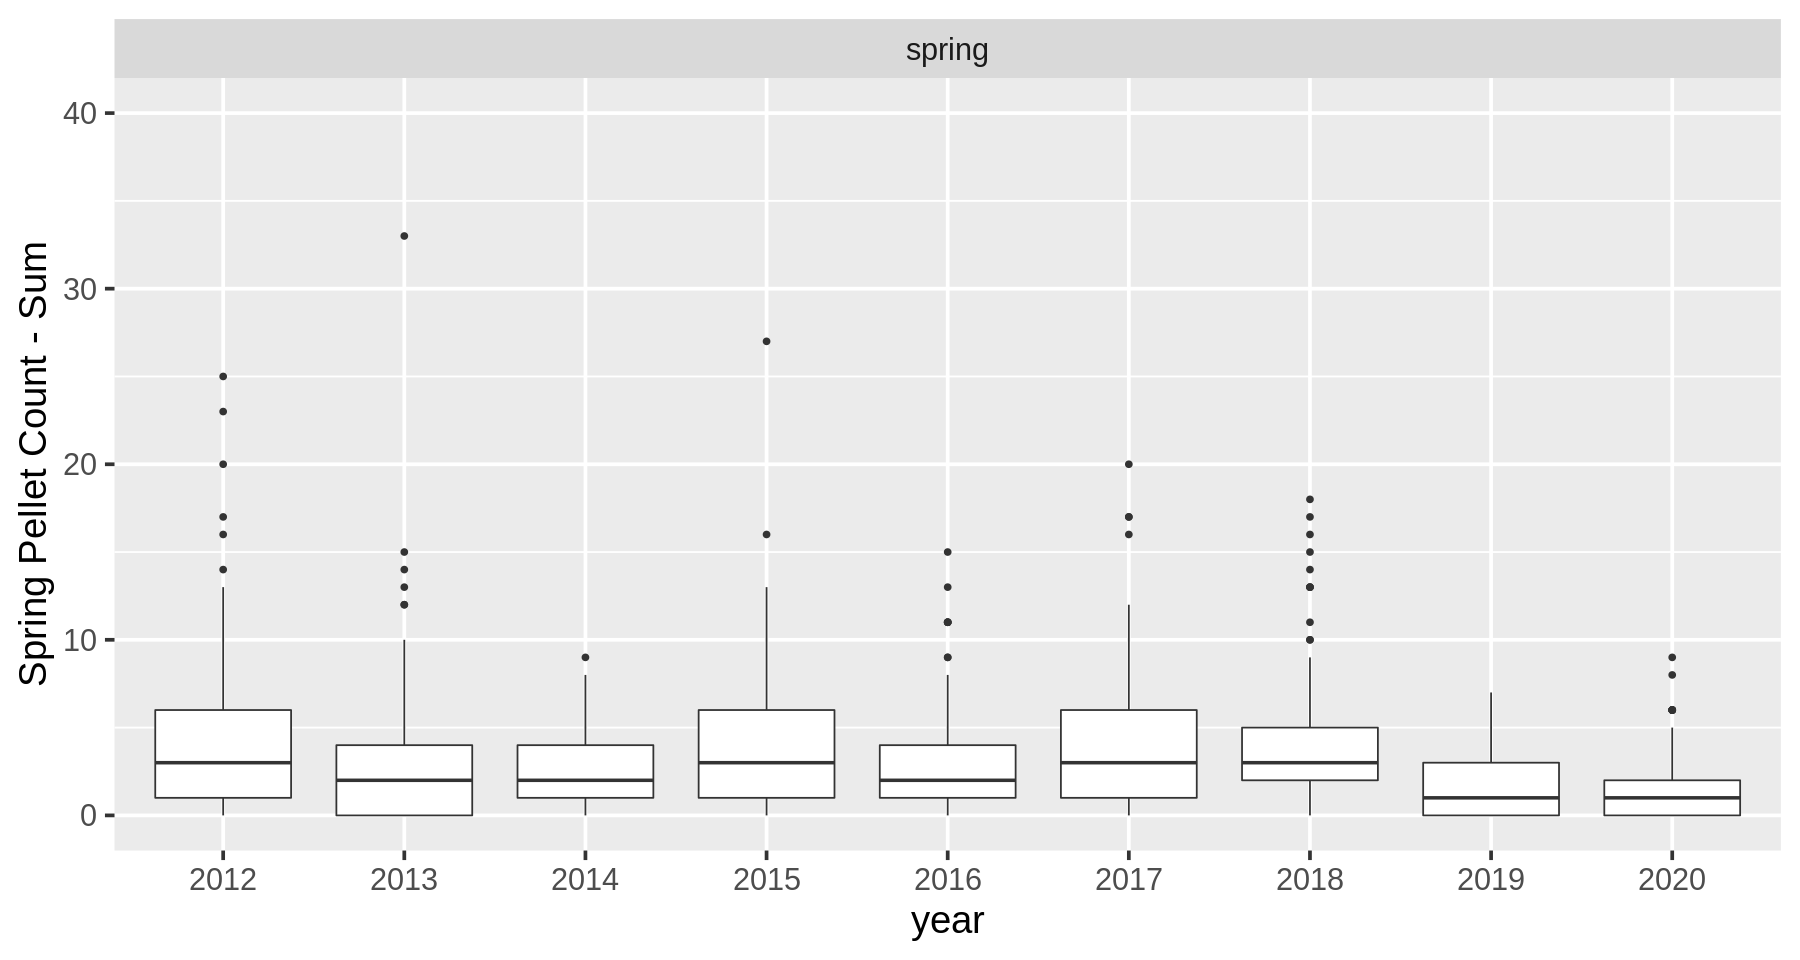

In [27]:
p <- ggplot(data = filter(pellet_counts, season == "spring")) +
  geom_boxplot(aes(x=year, y=sum_pellets), na.rm=TRUE)

p +
  scale_y_continuous(name="Spring Pellet Count - Sum", limits=c(0,40)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

### Fall

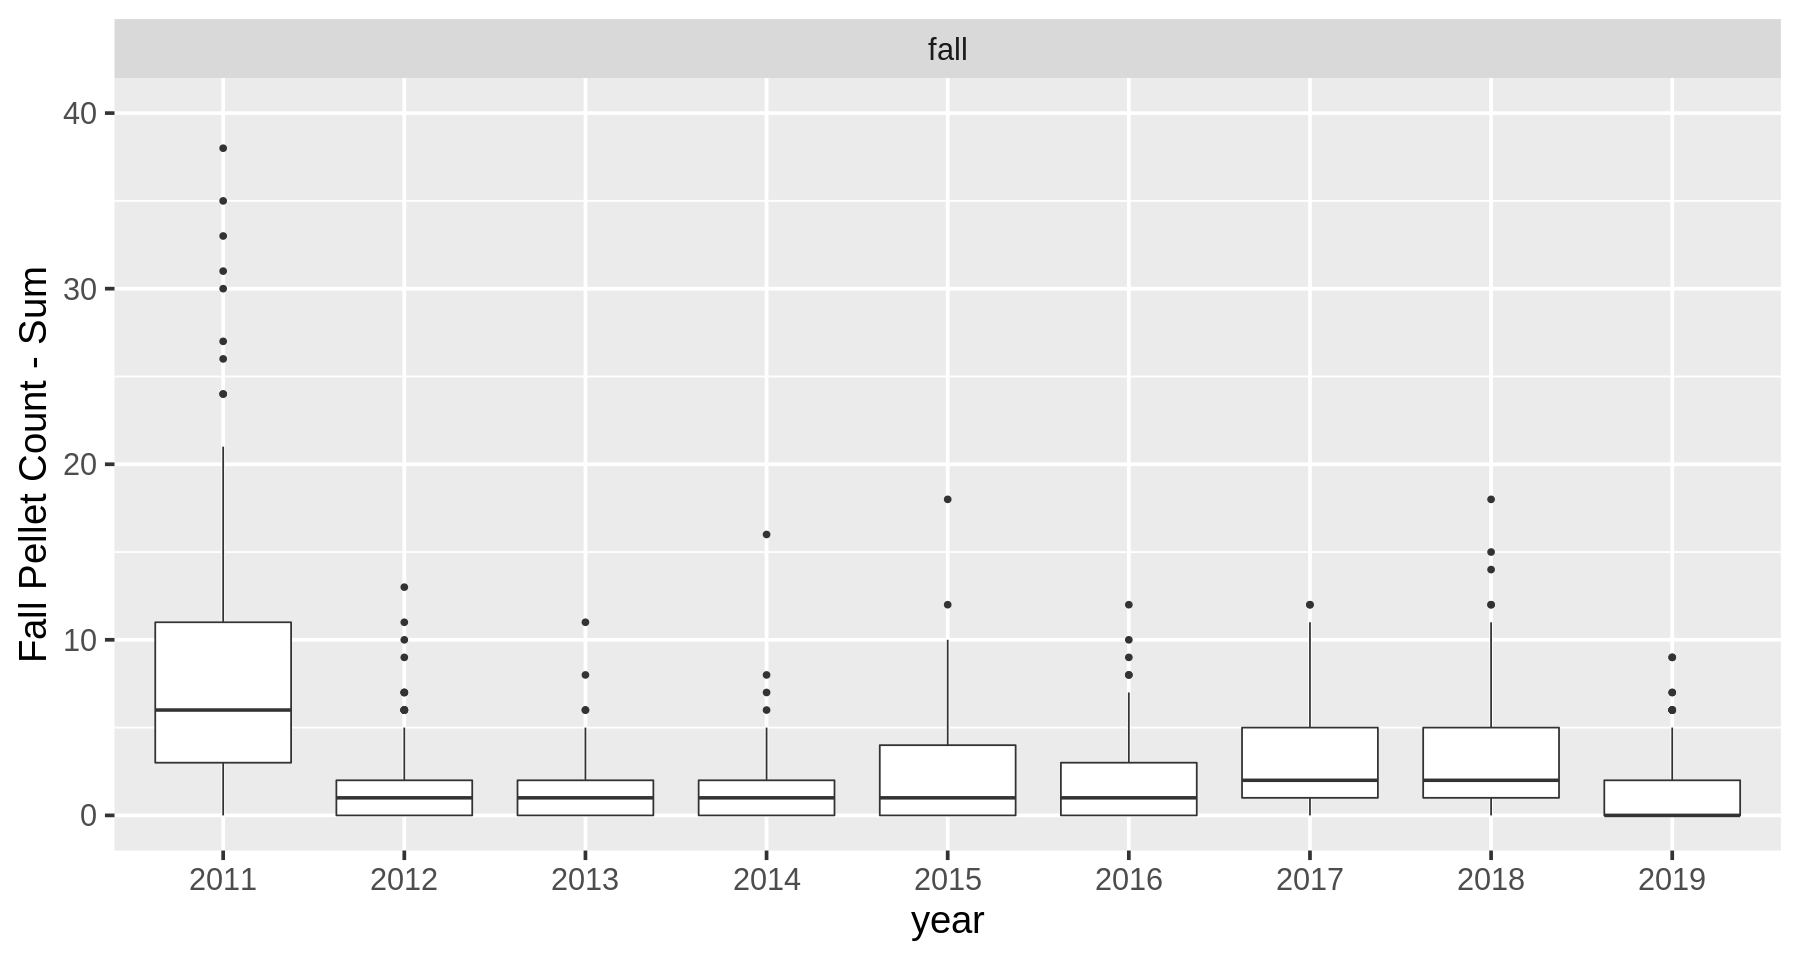

In [28]:
p <- ggplot(data = filter(pellet_counts, season == "fall")) +
  geom_boxplot(aes(x=year, y=sum_pellets), na.rm=TRUE)

p +
  scale_y_continuous(name="Fall Pellet Count - Sum", limits=c(0,40)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)